In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [123]:
df = pd.read_csv("../data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [126]:
print (set(df.isnull().sum()))
df = df.fillna(df.mean)
print (set(df.isnull().sum()))

{0}
{0}


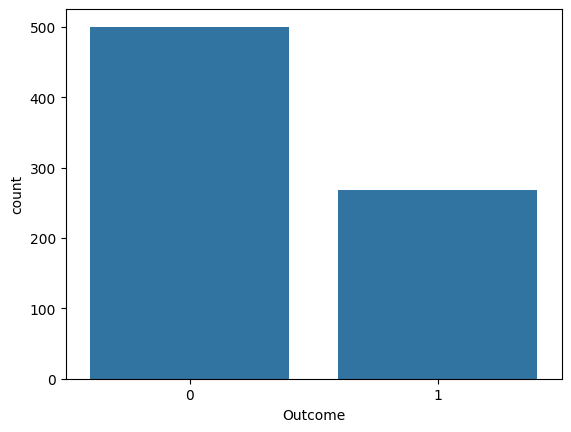

Outcome
0    500
1    268
Name: count, dtype: int64


In [127]:
sns.countplot(data=df, 
             x="Outcome")
plt.show()

print (df['Outcome'].value_counts())

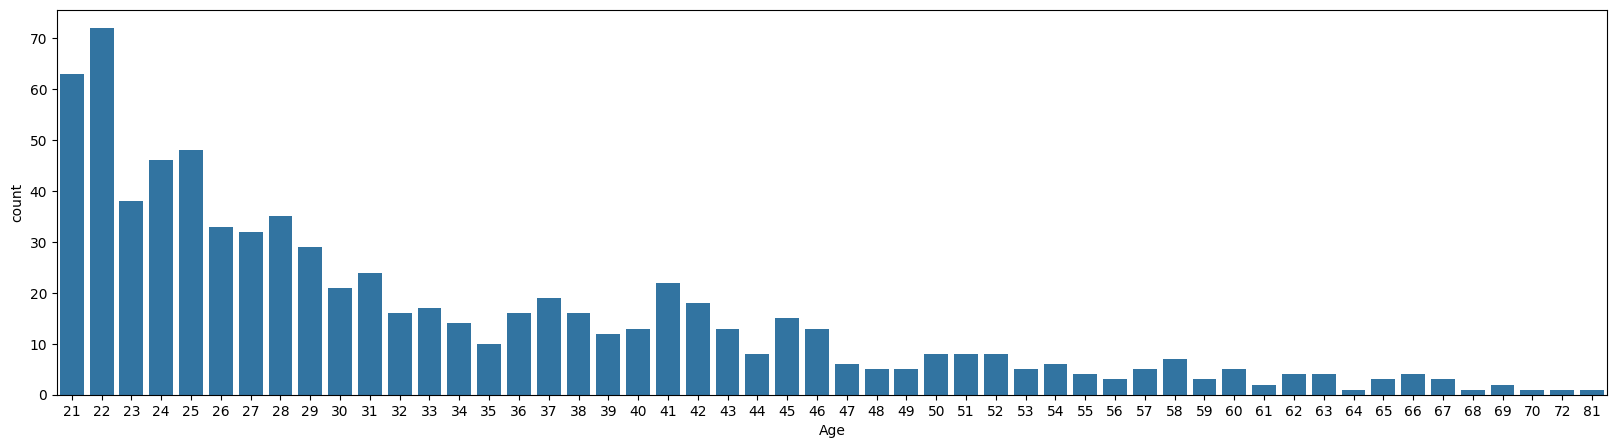

In [128]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df, 
             x="Age")
plt.show()

<Axes: >

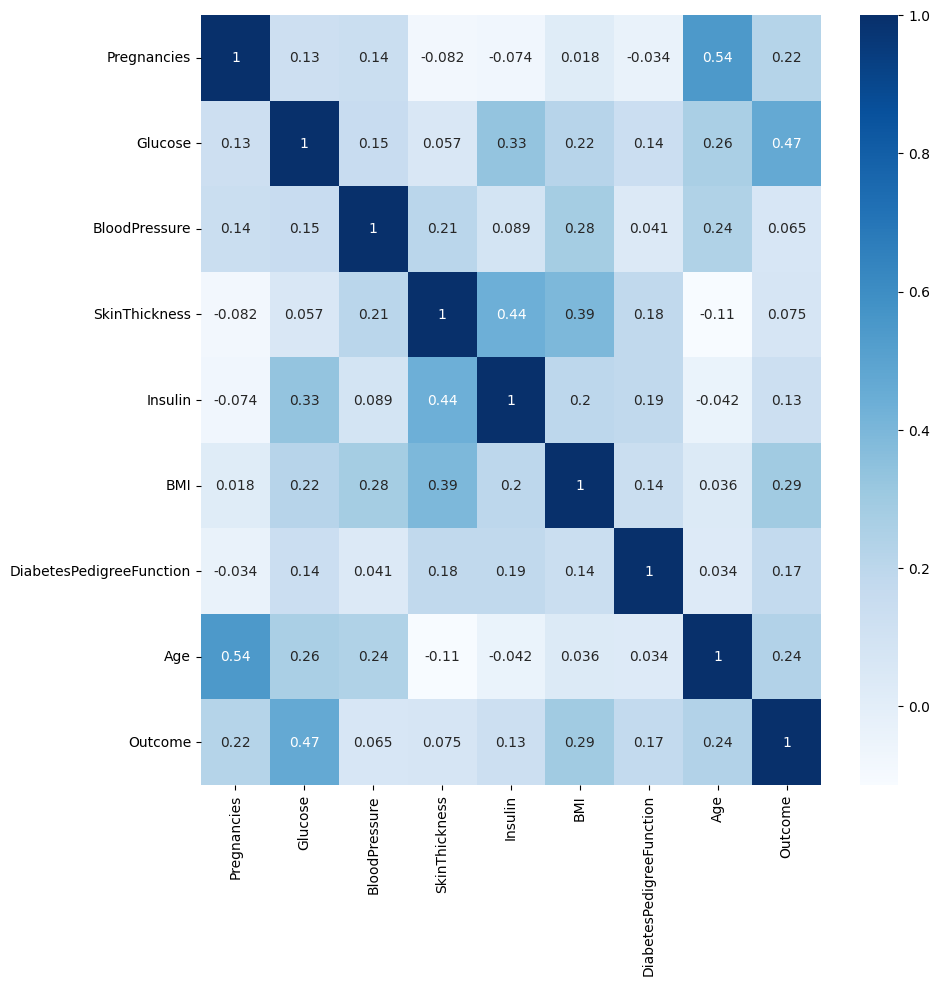

In [129]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, 
            cmap='Blues')

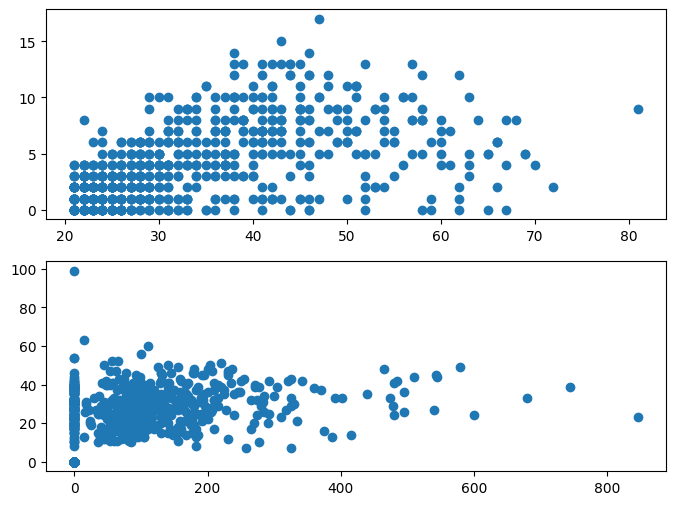

In [130]:
plt.figure(figsize=(8, 6))

'''
    corr (상관계수) 높은 feature끼리 시각화해봄
    Age - Pregnancies
    Insulin - SkinThickness
'''

plt.subplot(211)
plt.scatter (df['Age'],
            df['Pregnancies'])

plt.subplot(212)
plt.scatter (df['Insulin'],
            df['SkinThickness'])

In [131]:
data = df[[feature for feature in df.columns if feature != 'Outcome']]
target = df['Outcome']

data.shape, target.shape

((768, 8), (768,))

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                   test_size=0.2,
                                                    stratify=target)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.1,
                                                 stratify=y_train)

print (X_train.shape, X_test.shape, X_val.shape)

(552, 8) (154, 8) (62, 8)


<Axes: xlabel='Pregnancies', ylabel='Percent'>

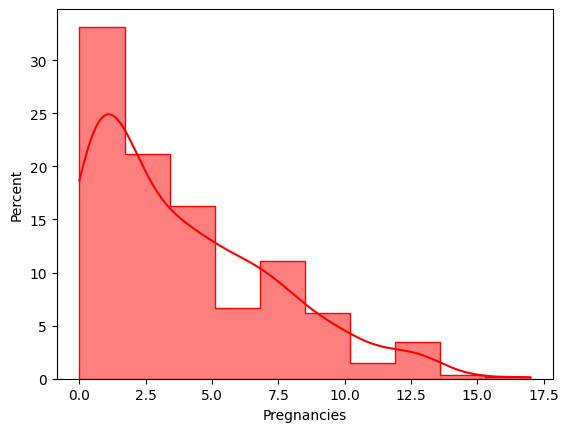

In [133]:
sns.histplot(x=X_train.iloc[:, 0], 
             color='r',
             bins=10,
             kde=True,
             element='step',
             stat='percent', 
             cumulative=False)

In [134]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

X_train_scaled = SS.fit_transform (X_train)
X_test_scaled = SS.transform(X_test)
X_val_scaled = SS.transform(X_val)

<Axes: ylabel='Percent'>

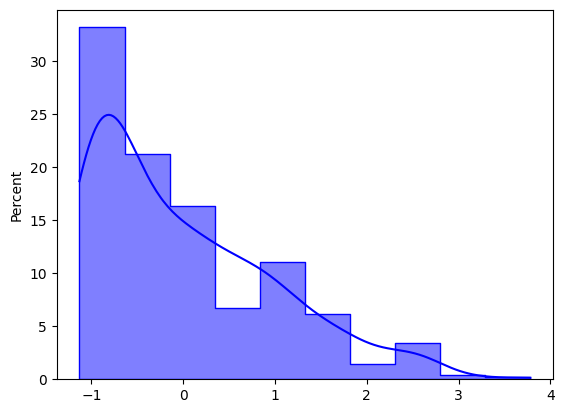

In [135]:
sns.histplot(x=X_train_scaled[:, 0],  
             color='b',
             bins=10,
             kde=True,
             element='step',
             stat='percent', 
             cumulative=False)

In [136]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(sparse_output=False)  #

y_train_encoded = OHE.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = OHE.transform(y_test.values.reshape(-1, 1))
y_val_encoded = OHE.transform(y_val.values.reshape(-1, 1))

print(y_train_encoded)
print(y_test_encoded)
print (y_val_encoded)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1.

---

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 13,190 (51.52 KB)

 Trainable params: 12,694 (49.59 KB)

 Non-trainable params: 496 (1.94 KB)

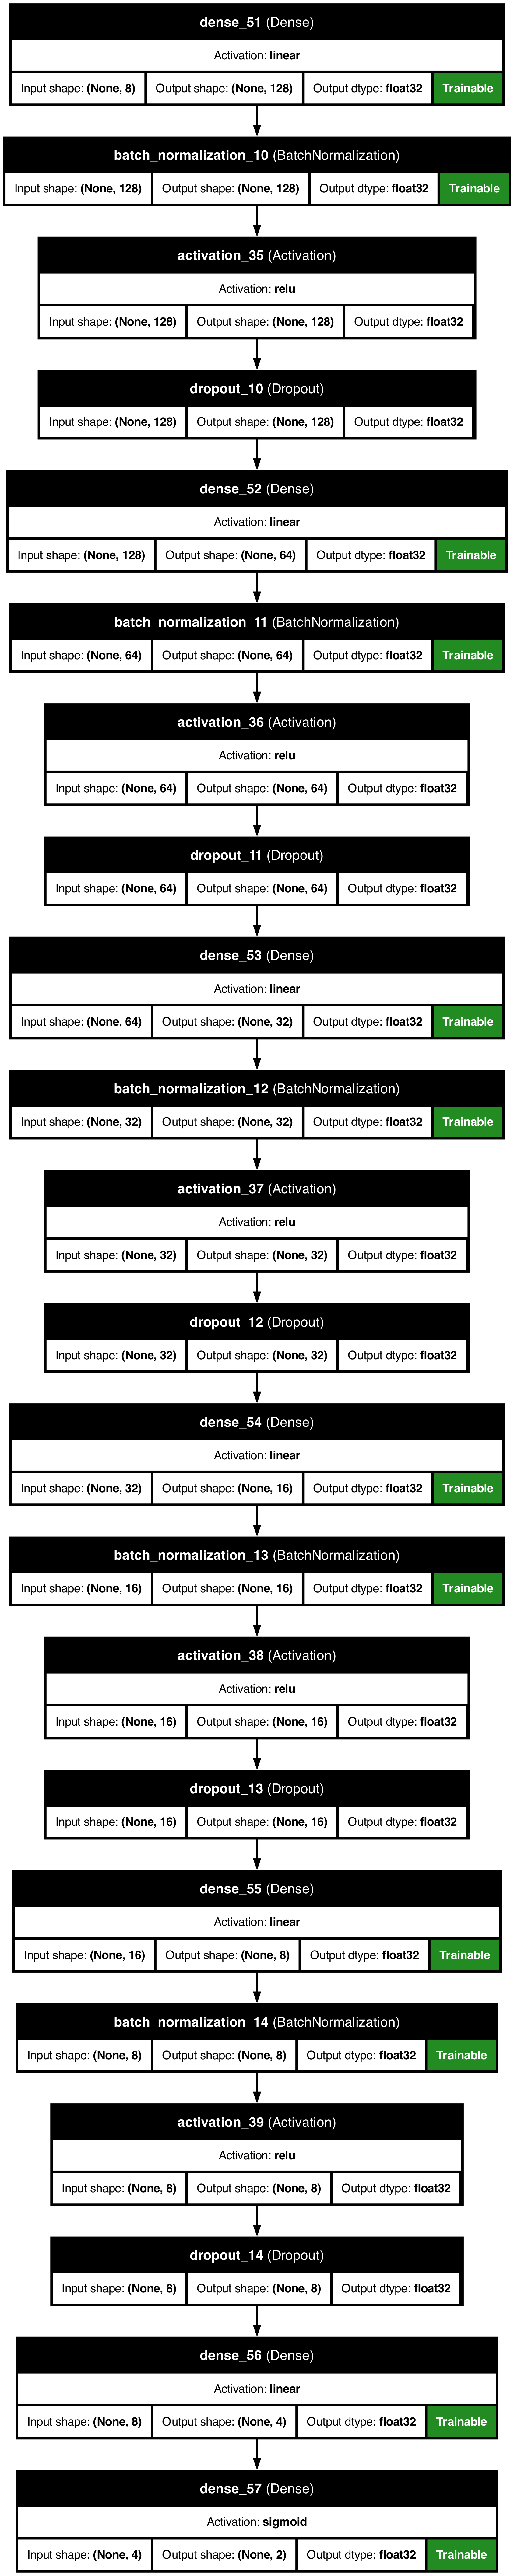

In [137]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
import tensorflow as tf

model = Sequential([
    Dense(128, input_shape=(8,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(8),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.05), 
    
    Dense(4),
    Dense(2, activation='sigmoid'),  
])

model.summary()

tf.keras.utils.plot_model(model, 
                          show_dtype=True,
                          show_layer_activations=True, 
                          show_layer_names=True, 
                          show_shapes=True, 
                          show_trainable=True)


In [138]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.optimizers.Adam(learning_rate=0.001), 
             metrics=['Accuracy'])

history = model.fit (X_train_scaled, y_train_encoded,
                    validation_data=(X_val_scaled, y_val_encoded),
                    verbose=2,
                    epochs=100)

Epoch 1/100
18/18 - 4s - 232ms/step - Accuracy: 0.5562 - loss: 0.7340 - val_Accuracy: 0.6935 - val_loss: 0.6828
Epoch 2/100
18/18 - 0s - 7ms/step - Accuracy: 0.6594 - loss: 0.6306 - val_Accuracy: 0.7258 - val_loss: 0.6700
Epoch 3/100
18/18 - 0s - 8ms/step - Accuracy: 0.7228 - loss: 0.5849 - val_Accuracy: 0.6774 - val_loss: 0.6585
Epoch 4/100
18/18 - 0s - 6ms/step - Accuracy: 0.7500 - loss: 0.5368 - val_Accuracy: 0.6774 - val_loss: 0.6413
Epoch 5/100
18/18 - 0s - 7ms/step - Accuracy: 0.7482 - loss: 0.5368 - val_Accuracy: 0.6613 - val_loss: 0.6310
Epoch 6/100
18/18 - 0s - 6ms/step - Accuracy: 0.7826 - loss: 0.4900 - val_Accuracy: 0.6613 - val_loss: 0.6103
Epoch 7/100
18/18 - 0s - 8ms/step - Accuracy: 0.7917 - loss: 0.4908 - val_Accuracy: 0.6452 - val_loss: 0.6009
Epoch 8/100
18/18 - 0s - 7ms/step - Accuracy: 0.7663 - loss: 0.4794 - val_Accuracy: 0.6452 - val_loss: 0.6068
Epoch 9/100
18/18 - 0s - 8ms/step - Accuracy: 0.7971 - loss: 0.4481 - val_Accuracy: 0.6613 - val_loss: 0.6015
Epoch 10

Epoch 75/100
18/18 - 0s - 6ms/step - Accuracy: 0.8641 - loss: 0.2990 - val_Accuracy: 0.6935 - val_loss: 0.7381
Epoch 76/100
18/18 - 0s - 8ms/step - Accuracy: 0.8768 - loss: 0.2925 - val_Accuracy: 0.6774 - val_loss: 0.7212
Epoch 77/100
18/18 - 0s - 6ms/step - Accuracy: 0.8678 - loss: 0.2800 - val_Accuracy: 0.6935 - val_loss: 0.7522
Epoch 78/100
18/18 - 0s - 6ms/step - Accuracy: 0.8605 - loss: 0.3015 - val_Accuracy: 0.6613 - val_loss: 0.8434
Epoch 79/100
18/18 - 0s - 8ms/step - Accuracy: 0.8551 - loss: 0.3026 - val_Accuracy: 0.6613 - val_loss: 0.8075
Epoch 80/100
18/18 - 0s - 9ms/step - Accuracy: 0.8822 - loss: 0.3097 - val_Accuracy: 0.6613 - val_loss: 0.9290
Epoch 81/100
18/18 - 0s - 8ms/step - Accuracy: 0.8841 - loss: 0.2731 - val_Accuracy: 0.6613 - val_loss: 0.8489
Epoch 82/100
18/18 - 0s - 7ms/step - Accuracy: 0.8659 - loss: 0.2796 - val_Accuracy: 0.6774 - val_loss: 0.7709
Epoch 83/100
18/18 - 0s - 7ms/step - Accuracy: 0.8678 - loss: 0.2848 - val_Accuracy: 0.6774 - val_loss: 0.6931
E

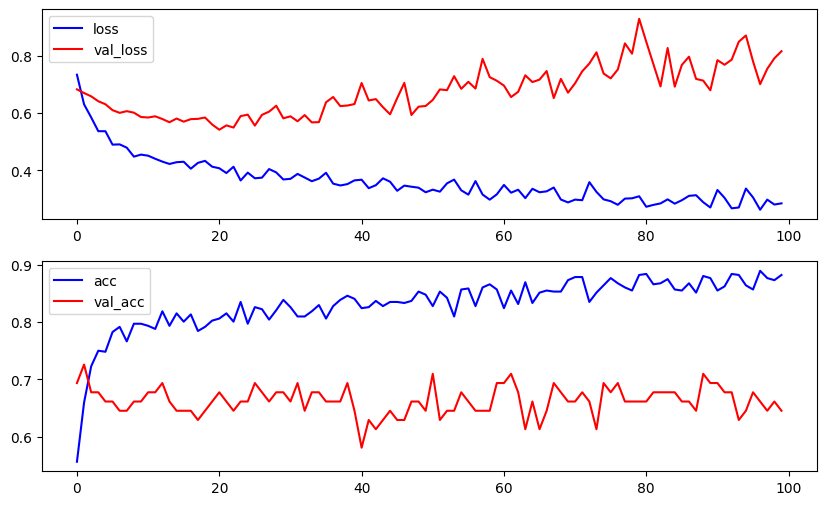

In [139]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot(history.history['loss'],
        c='b', label='loss')
plt.plot(history.history['val_loss'],
        c='r', label='val_loss')
plt.legend()

plt.subplot(212)
plt.plot(history.history['Accuracy'],
        c='b', label='acc')
plt.plot(history.history['val_Accuracy'],
        c='r', label='val_acc')
plt.legend()

In [141]:
model.evaluate (X_train_scaled, y_train_encoded)
model.evaluate (X_val_scaled, y_val_encoded)
model.evaluate (X_test_scaled, y_test_encoded)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.9540 - loss: 0.1597 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - Accuracy: 0.6489 - loss: 0.7931
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.7658 - loss: 0.6426 


[0.5982332229614258, 0.7792207598686218]

<Axes: >

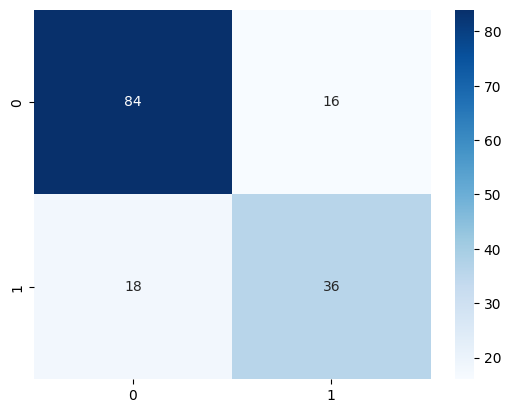

In [144]:
from sklearn.metrics import confusion_matrix

y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d')

In [145]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

print("Classification Report:\n", classification_report(y_test_class, y_pred_class))
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Recall:", recall_score(y_test_class, y_pred_class))
print("Precision:", precision_score(y_test_class, y_pred_class))
print("F1 Score:", f1_score(y_test_class, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.67      0.68        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

Accuracy: 0.7792207792207793
Recall: 0.6666666666666666
Precision: 0.6923076923076923
F1 Score: 0.6792452830188679


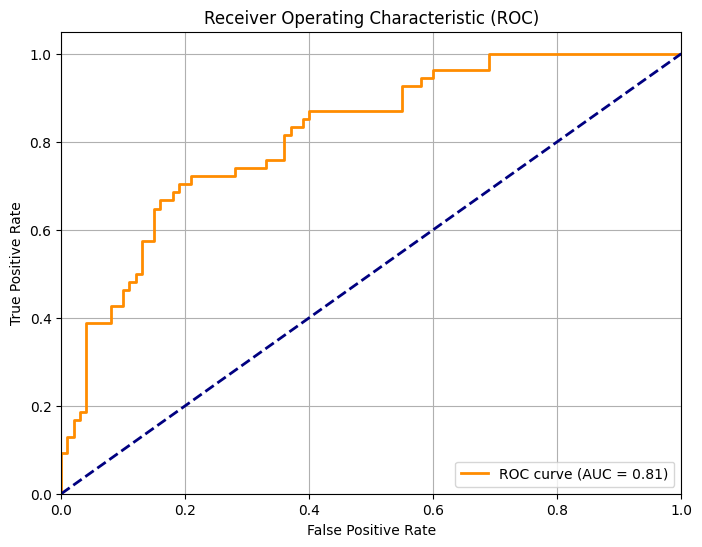

In [146]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_encoded[:, 1], y_pred[:, 1]) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
